In [139]:
import pickle
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from projects.mmdet3d_plugin.datasets.utils import box3d_to_corners
pkl_path = 'work_dirs/sparsedrive_small_stage2/results_mini.pkl'

with open(pkl_path, 'rb') as f:
    result_all = pickle.load(f)
# result = result[0]['img_bbox']
    
color_mapping = np.asarray([
    [127, 24, 13],
    [147, 170, 0],
    [89, 51, 21],
    [241, 58, 19],
    [35, 44, 22],
    [112, 224, 255],
    [70, 184, 160],
    [153, 0, 255],
    [71, 255, 0],
    [255, 0, 163],
    [255, 204, 0],
    [0, 255, 235],
    [255, 0, 235],
    [255, 0, 122],
    [255, 245, 0],
    [10, 190, 212],
    [214, 255, 0],
    [0, 204, 255],
    [20, 0, 255],
    [255, 255, 0],
    [0, 153, 255],
    [0, 255, 204],
    [41, 255, 0],
    [173, 0, 255],
    [0, 245, 255],
    [71, 0, 255],
    [0, 255, 184],
    [0, 92, 255],
    [184, 255, 0],
    [255, 214, 0],
    [25, 194, 194],
    [92, 0, 255],
    [220, 220, 220],
    [255, 9, 92],
    [112, 9, 255],
    [8, 255, 214],
    [255, 184, 6],
    [10, 255, 71],
    [255, 41, 10],
    [7, 255, 255],
    [224, 255, 8],
    [102, 8, 255],
    [255, 61, 6],
    [255, 194, 7],
    [0, 255, 20],
    [255, 8, 41],
    [255, 5, 153],
    [6, 51, 255],
    [235, 12, 255],
    [160, 150, 20],
    [0, 163, 255],
    [140, 140, 140],
    [250, 10, 15],
    [20, 255, 0],
])


In [151]:
result_all[0]['img_bbox'].keys()

dict_keys(['boxes_3d', 'scores_3d', 'labels_3d', 'cls_scores', 'instance_ids', 'vectors', 'scores', 'labels'])

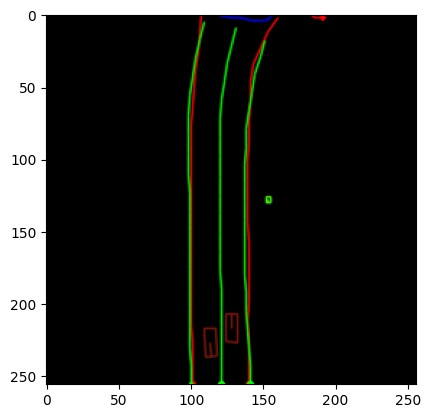

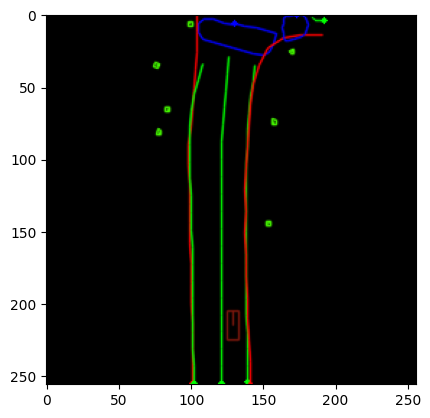

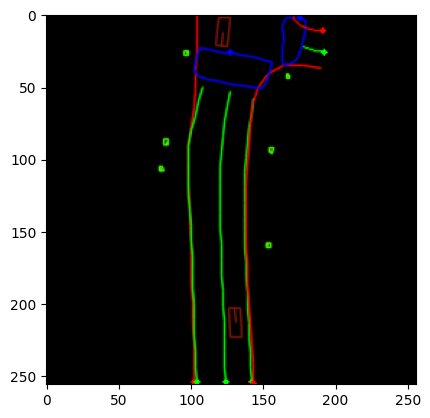

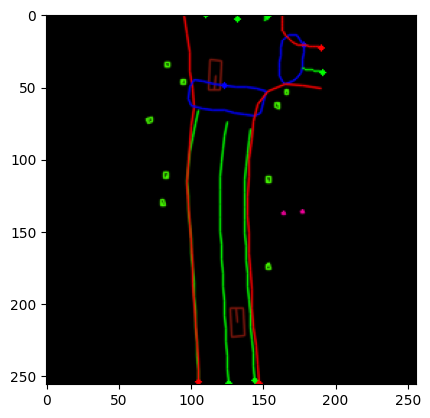

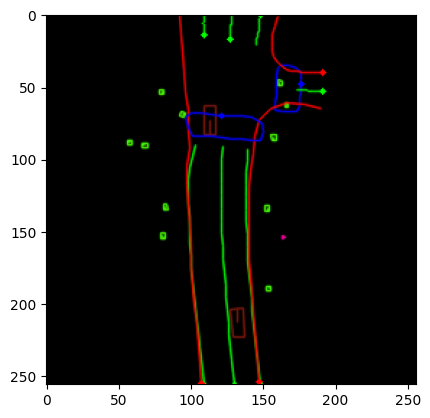

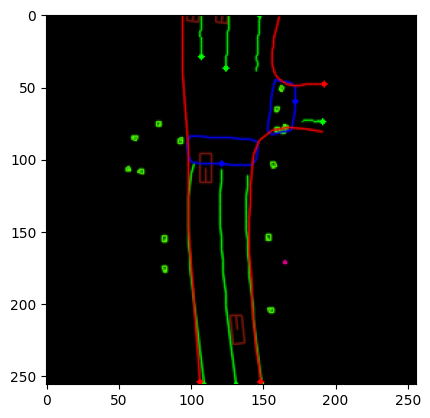

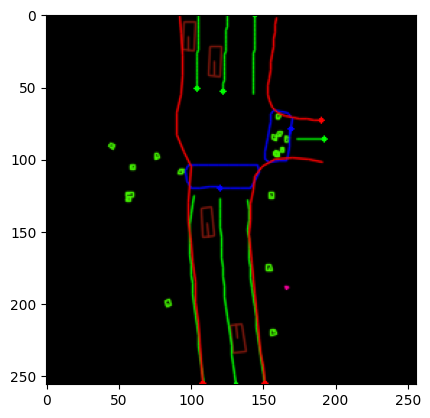

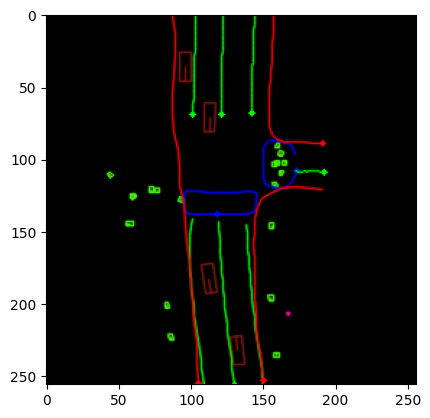

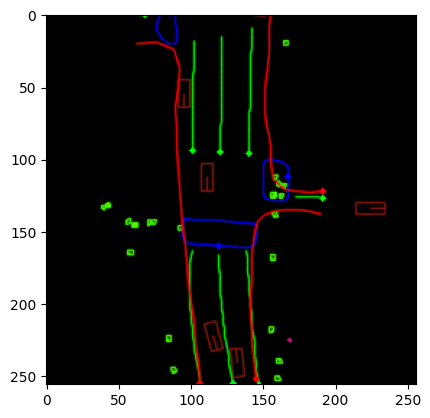

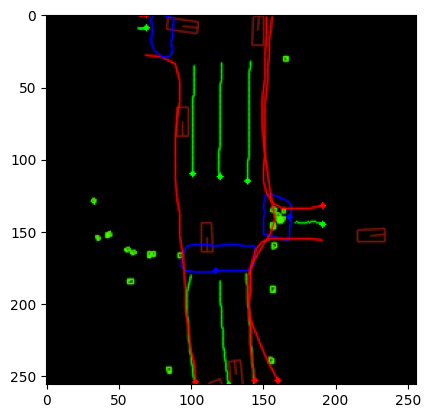

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f4209994d90>>
Traceback (most recent call last):
  File "/home/eddy/miniconda3/envs/sparsedrive/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


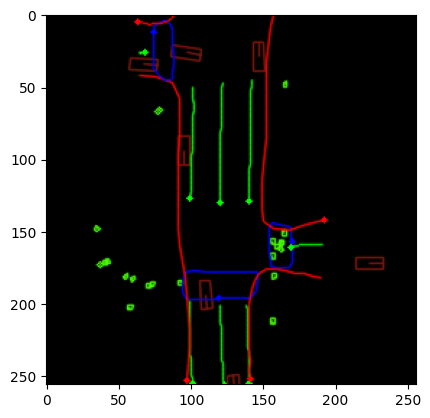

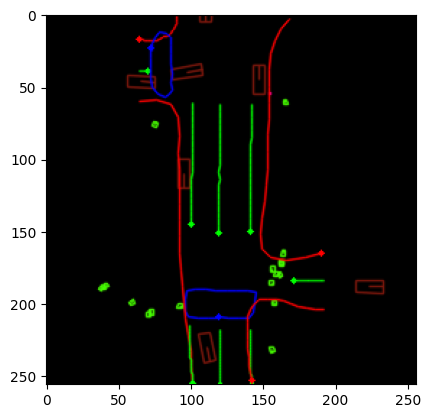

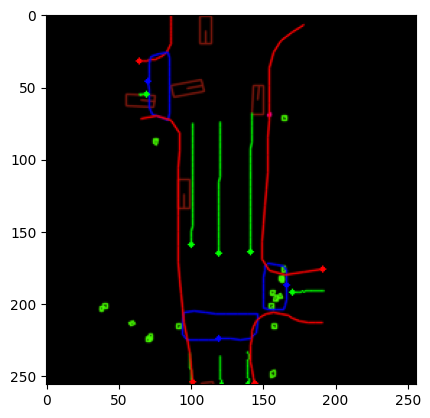

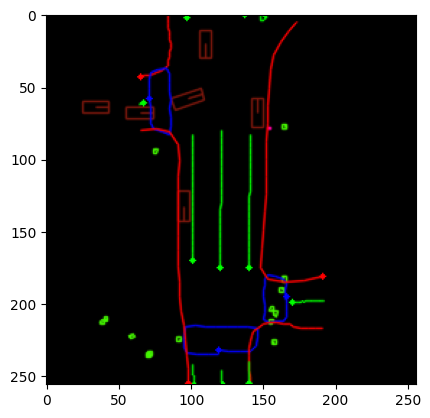

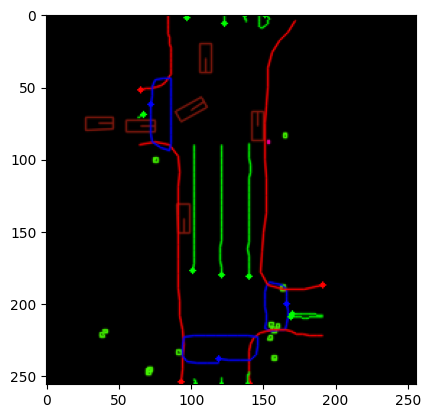

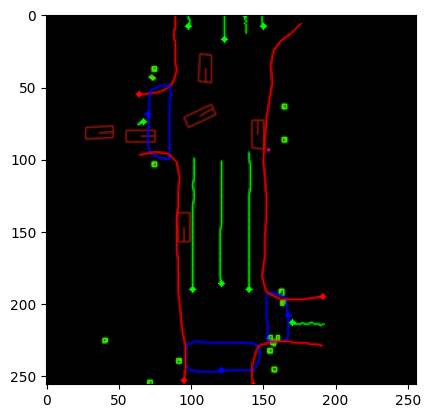

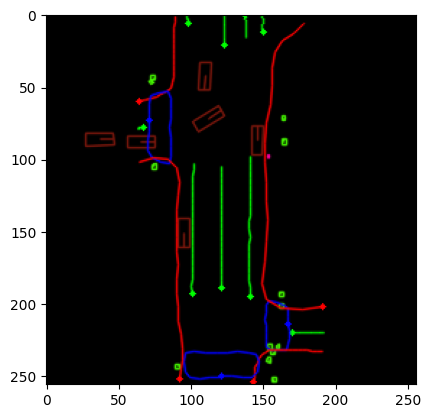

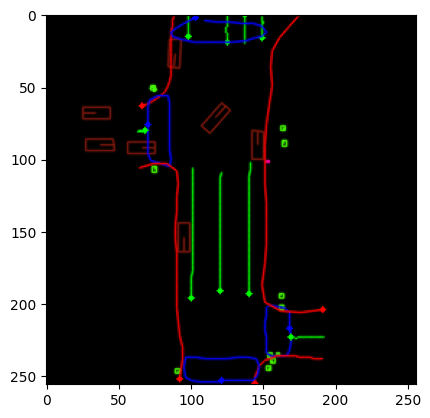

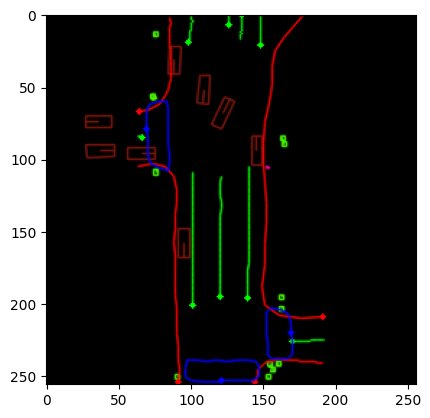

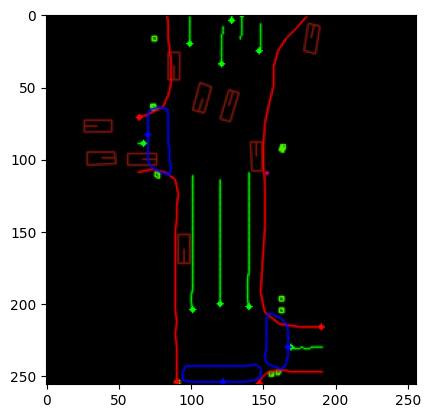

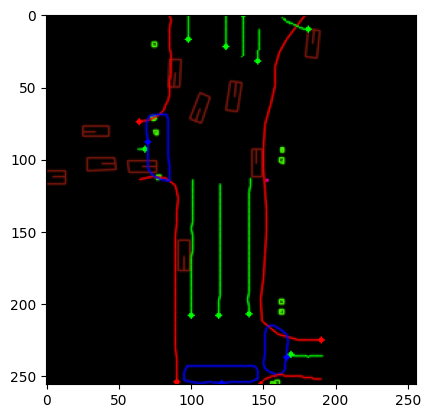

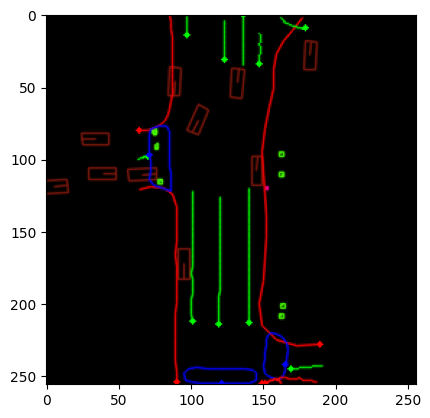

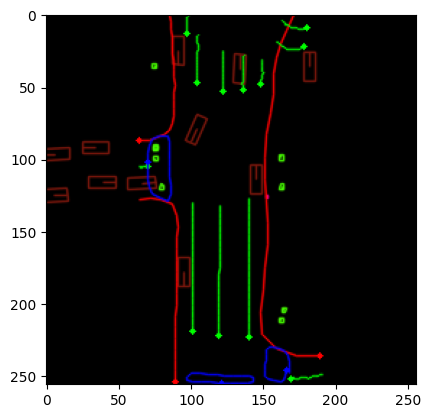

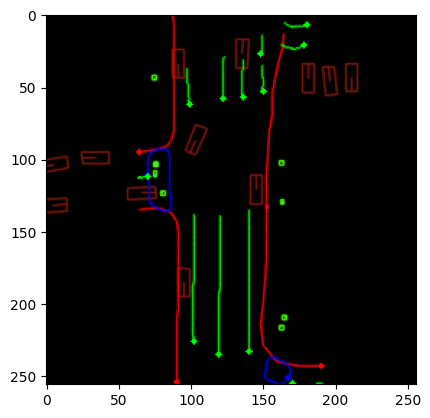

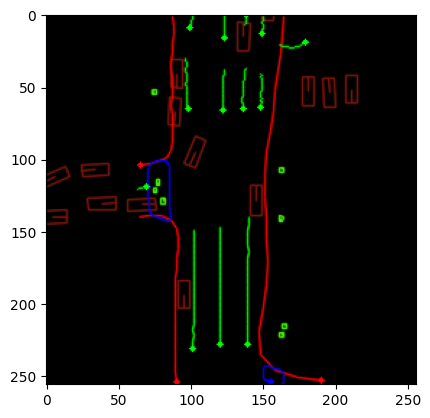

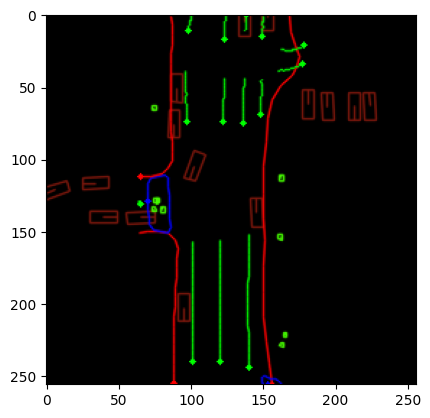

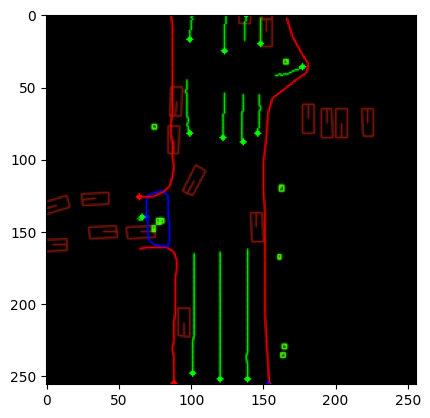

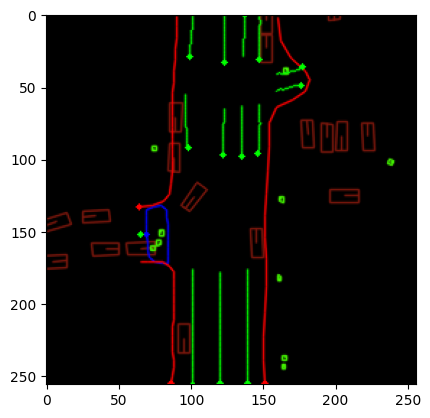

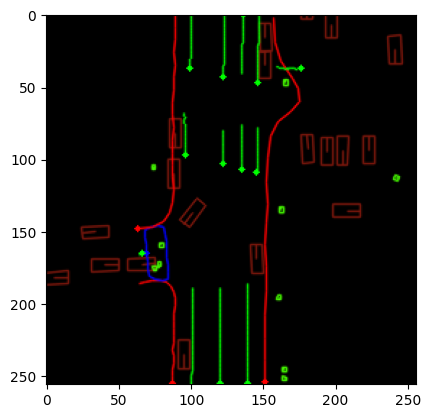

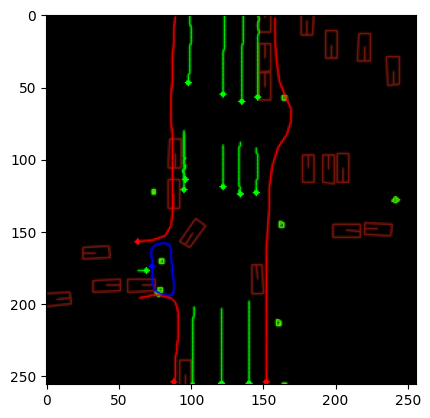

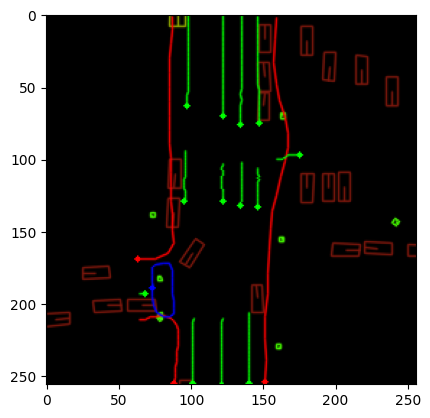

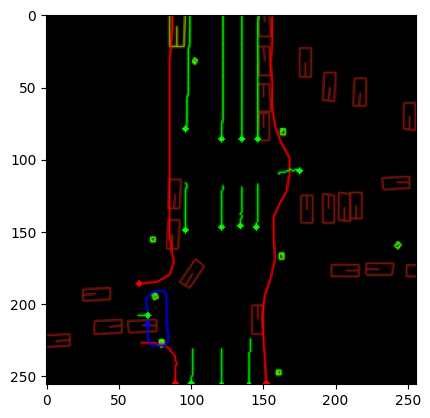

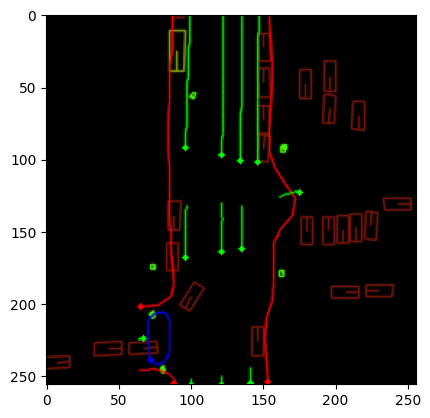

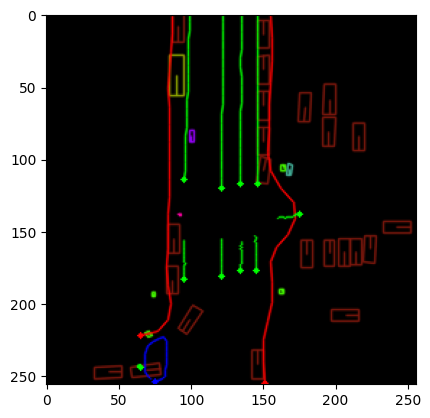

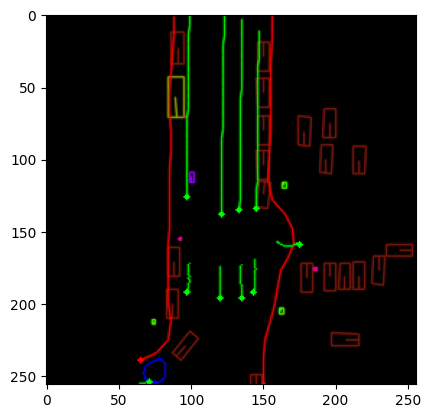

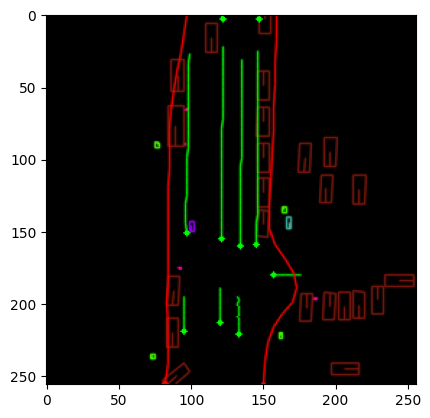

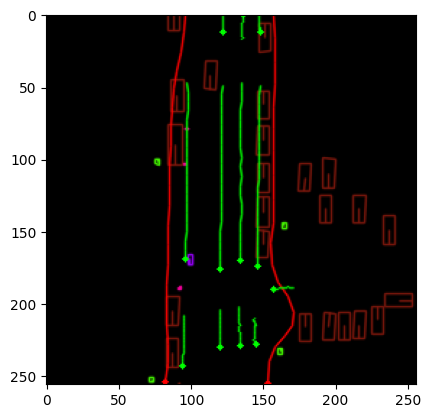

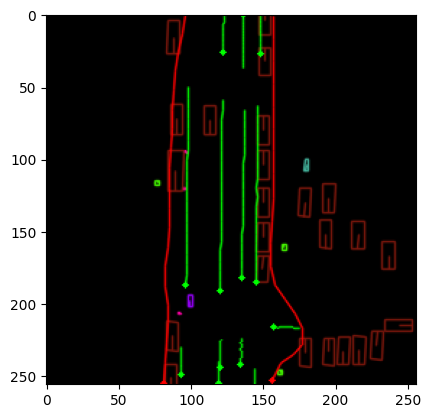

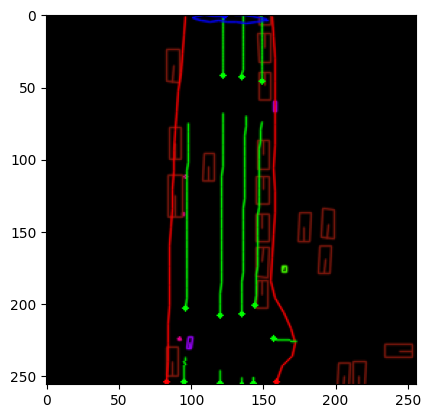

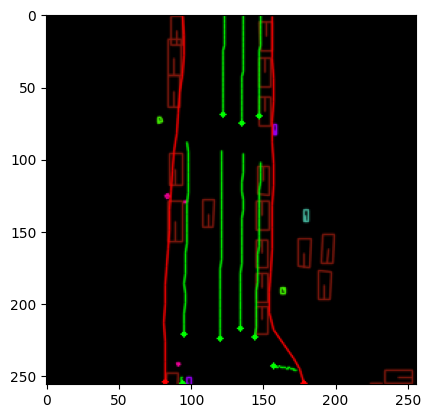

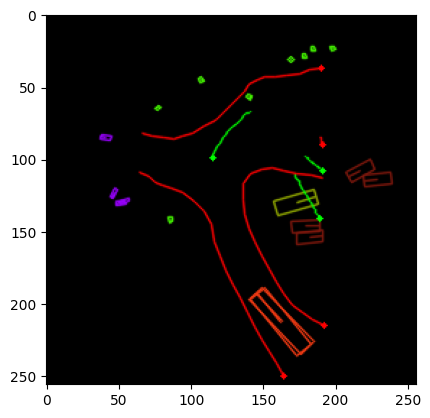

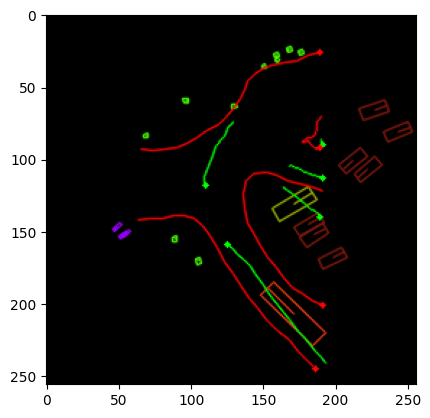

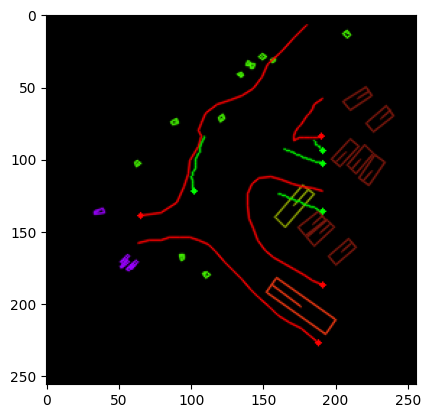

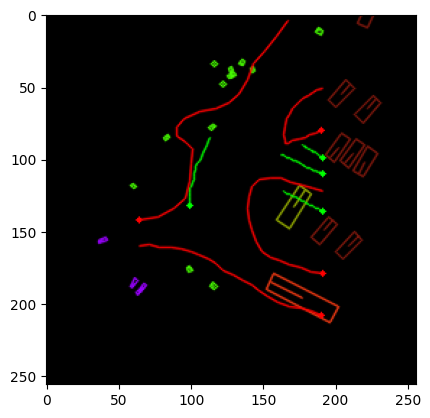

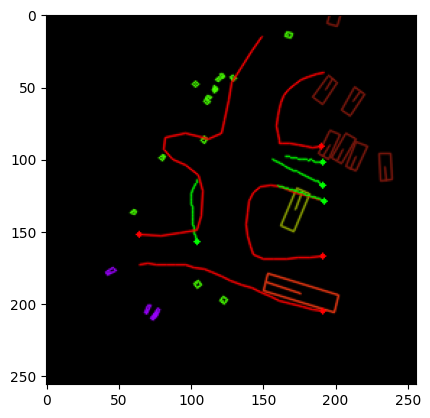

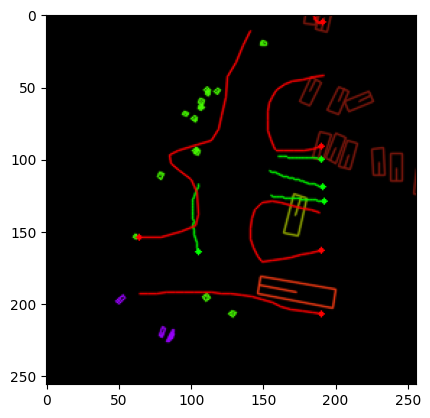

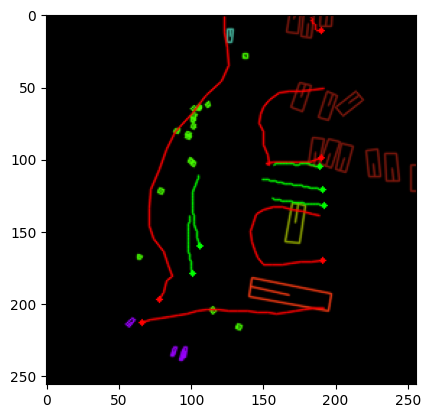

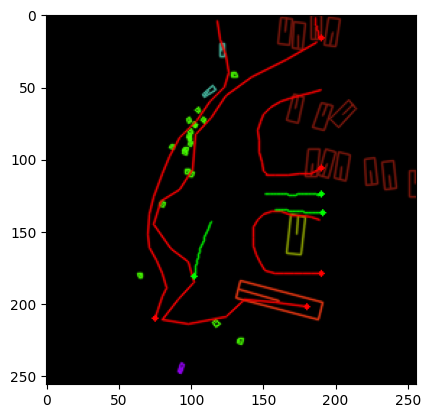

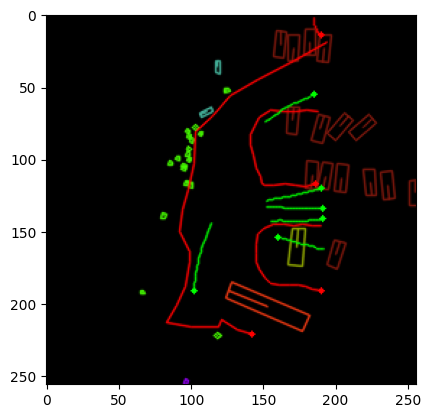

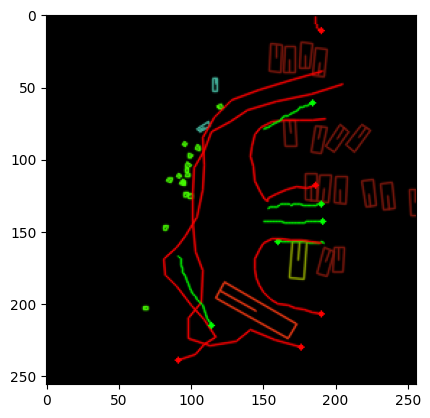

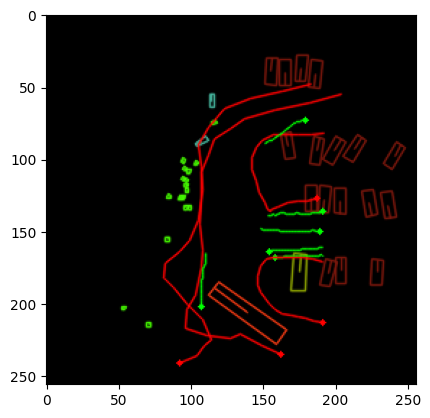

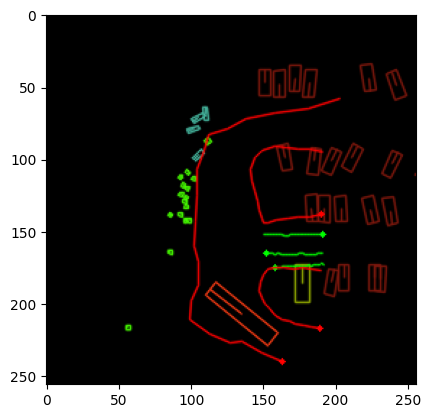

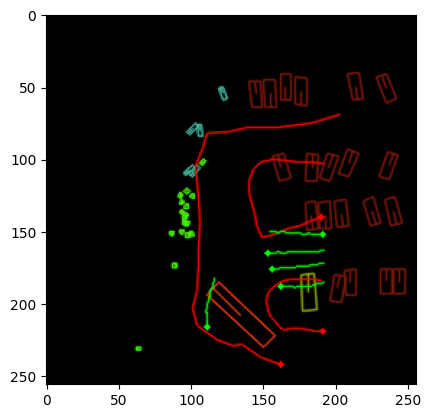

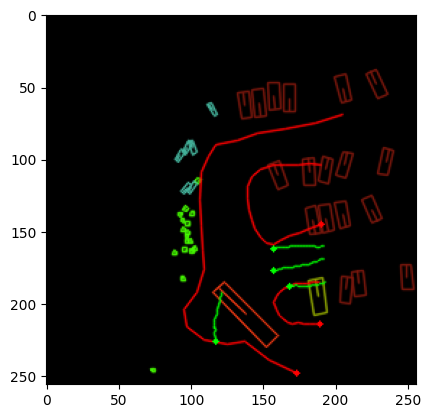

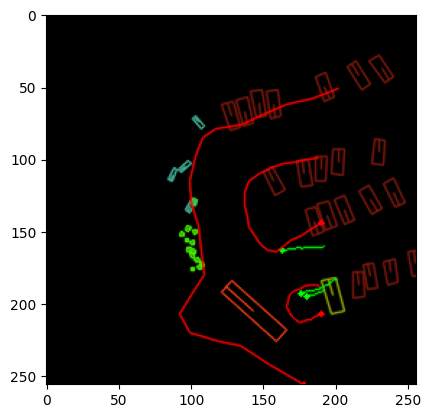

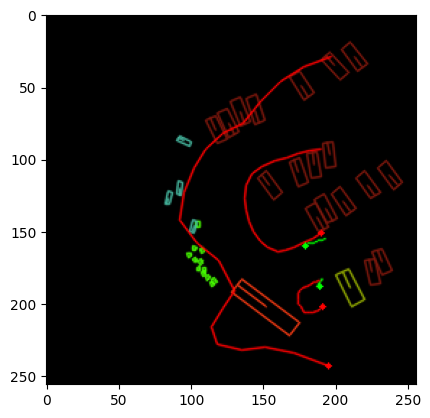

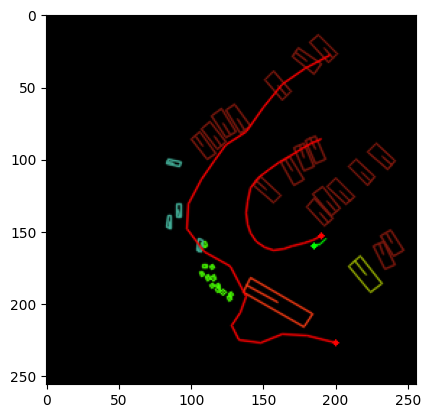

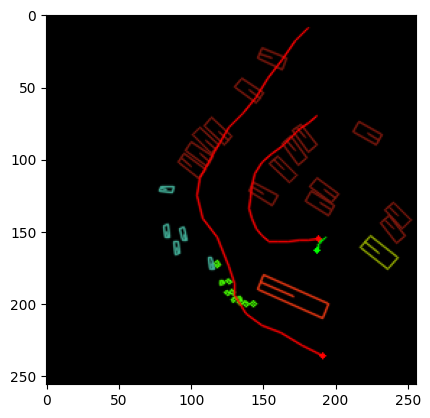

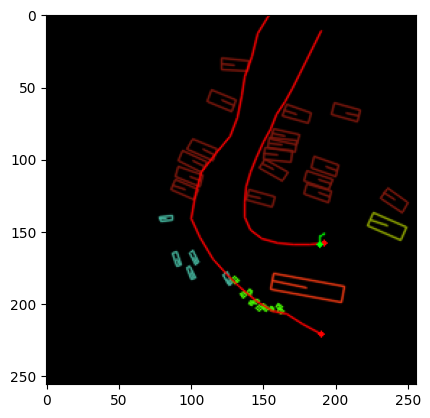

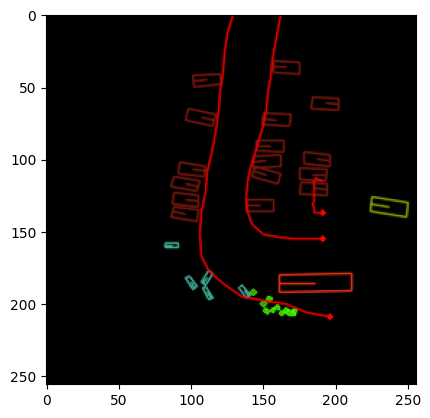

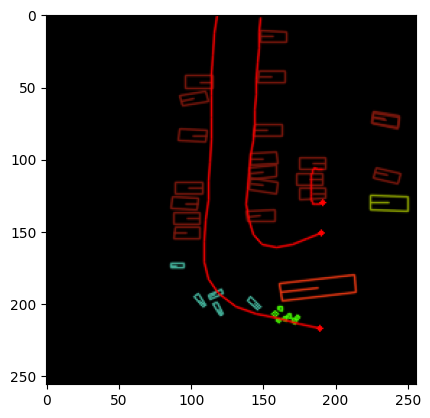

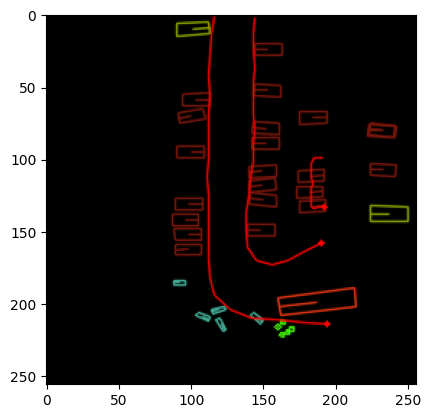

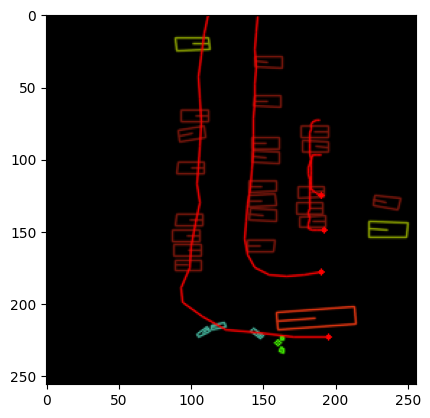

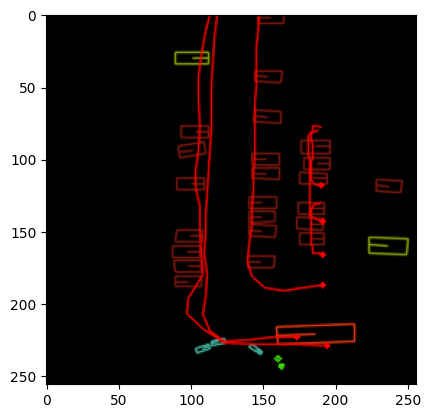

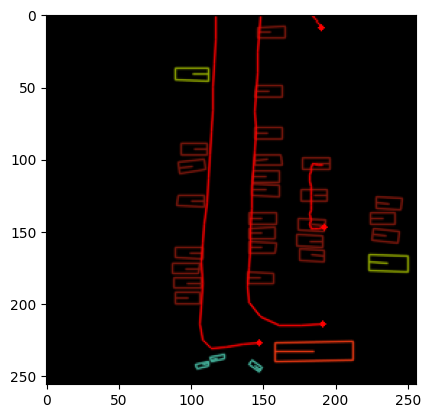

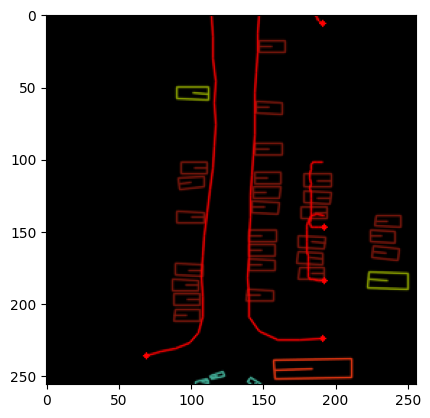

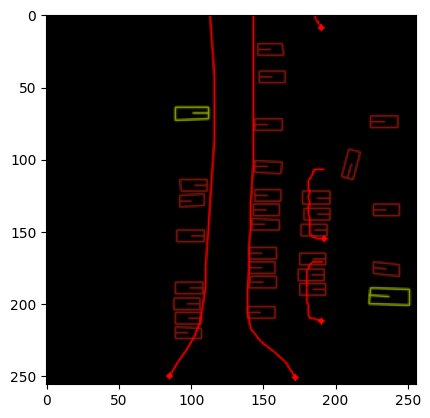

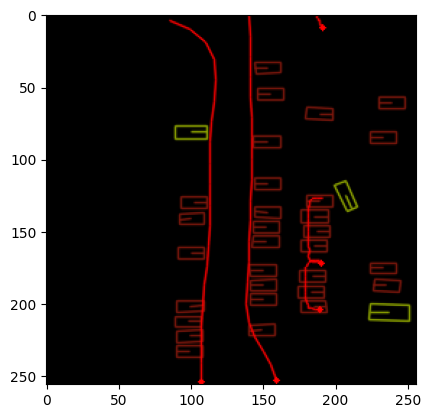

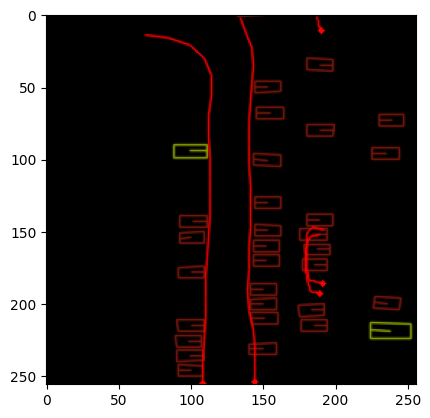

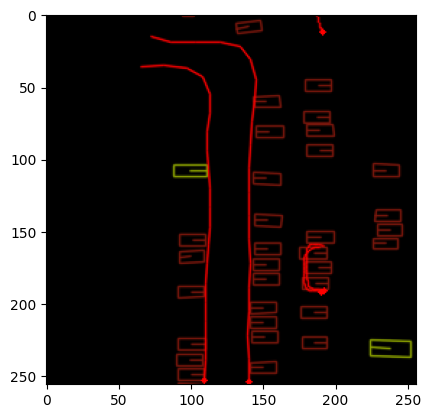

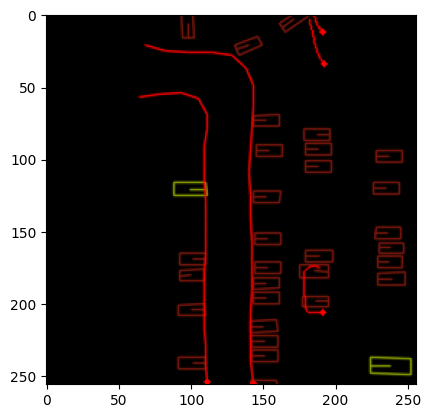

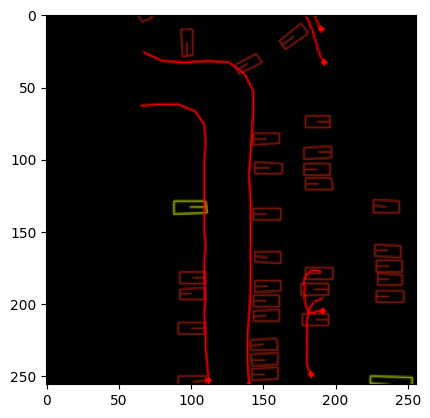

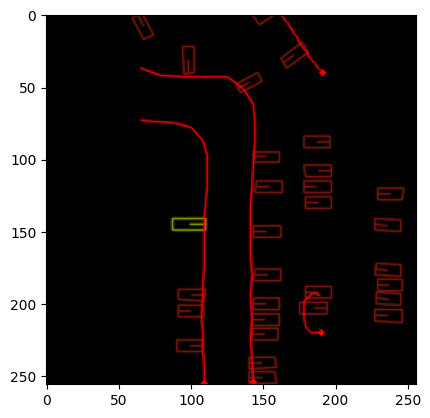

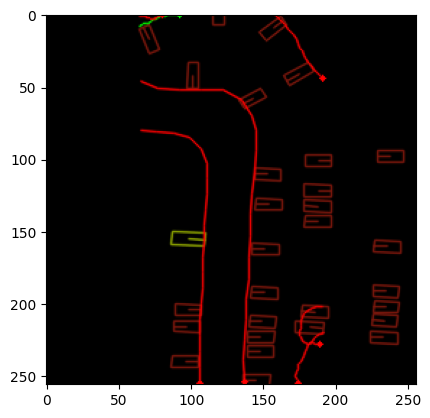

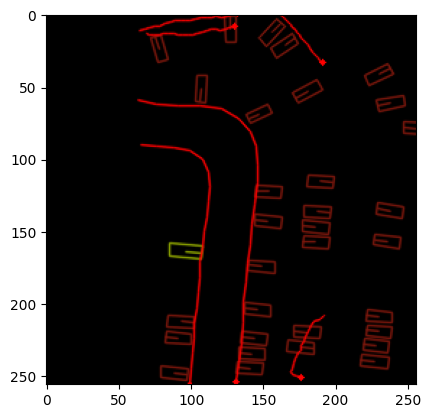

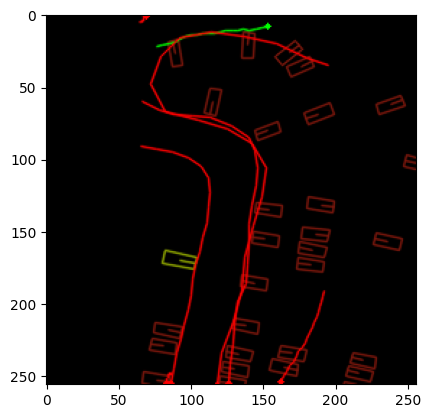

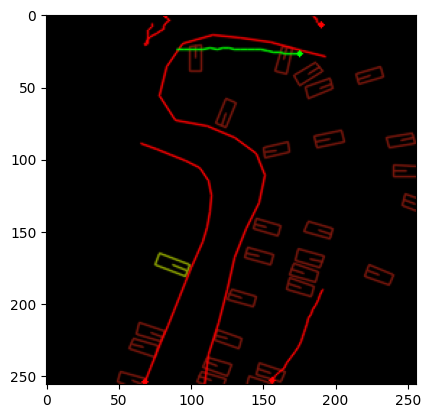

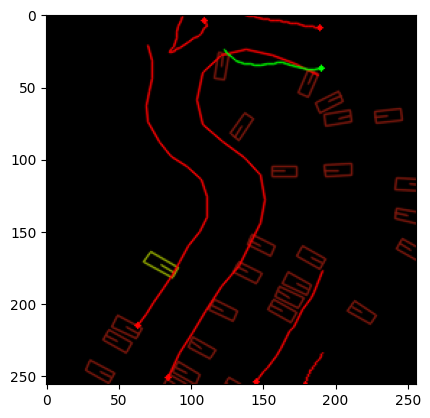

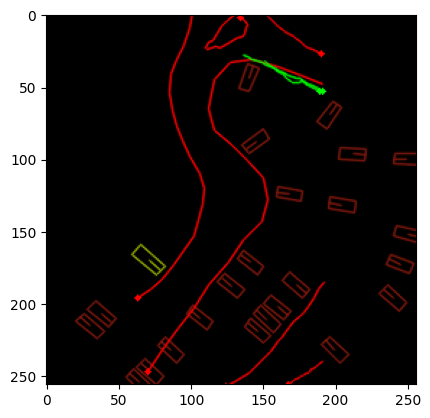

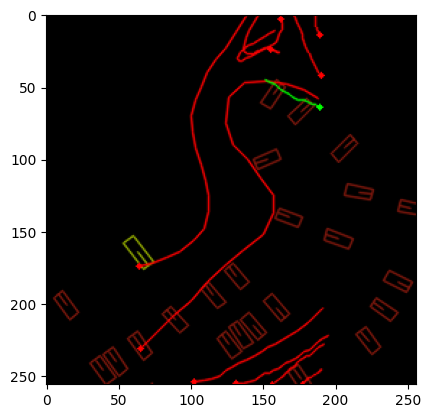

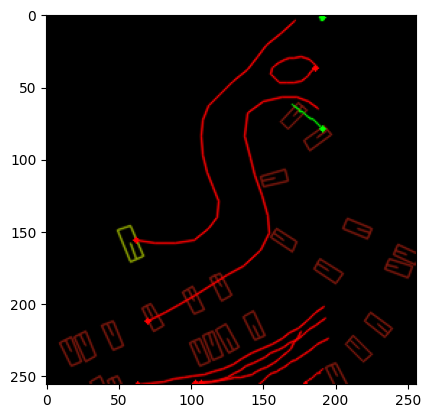

In [150]:


COLOR_VECTORS = [(0, 0, 255), (0, 255, 0), (255, 0, 0), (255, 255, 0), (0, 255, 255), (255, 0, 255)]
MAP_SCORE_THRESH = 0.3
SCORE_THRESH = 0.3
for result in result_all:
    img = np.zeros((256, 256, 3), dtype=np.uint8)

    result = result['img_bbox']

    bboxes = result['boxes_3d']
    for i in range(result['labels_3d'].shape[0]):
        score = result['scores_3d'][i]
        if score < SCORE_THRESH: 
            continue
        color = color_mapping[result['labels_3d'][i]]
        color = tuple(int(c) for c in color)
        # print('cls', result['labels_3d'][i])

        
        corners = box3d_to_corners(bboxes)[i, [0, 3, 7, 4, 0]]


        # draw front center line
        forward_center = np.mean(corners[2:4], axis=0)
        center = np.mean(corners[0:4], axis=0)
        x = [forward_center[0], center[0]]
        y = [forward_center[1], center[1]]

        x = [(i / 60 + 0.5) * 256 for i in x]
        y = [(1 - (i / 60 + 0.5)) * 256 for i in y]
        
        img = cv2.line(img, (int(x[0]), int(y[0]),), (int(x[1]), int(y[1])), color, 1, cv2.LINE_AA)

        # draw bbox
        x = corners[:, 0]
        y = corners[:, 1]

        
        x = (x / 60 + 0.5) * 256
        y = (1 - (y / 60 + 0.5)) * 256
        img = cv2.polylines(img, np.array([np.stack([x, y], axis=1)], dtype=np.int32), isClosed=True, color=color, thickness=1, lineType=cv2.LINE_AA)
    
    for i in range(result['scores'].shape[0]):
        score = result['scores'][i]
        if  score < MAP_SCORE_THRESH:
            continue
        color = COLOR_VECTORS[result['labels'][i]]
        # color = (0, 0, 255)
        pts = result['vectors'][i].copy()
        pts[:, 0] = (pts[:, 0] / 60 + 0.5) * 256 # x
        pts[:, 1] = (1 - (pts[:, 1] / 60 + 0.5)) * 256 # y

    
        img = cv2.polylines(img, np.array([pts], dtype=np.int32), isClosed=False, color=color, thickness=1, lineType=cv2.LINE_AA)
        img = cv2.circle(img, (int(pts[0, 0]), int(pts[0, 1])), 2, color, -1)
    plt.imshow(img)
    plt.show()
    # break
# for i in range(result['scores'].shape[0]):
#     score = result['scores'][i]
#     if  score < MAP_SCORE_THRESH:
#         continue
#     color = COLOR_VECTORS[result['labels'][i]]
#     pts = result['vectors'][i]
#     x = pts[:, 0] / 30 + 0.5
#     y = pts[:, 1] / 60 + 0.5
#     plt.plot(x, y, color=color, linewidth=3, marker='o', linestyle='-', markersize=7)

In [66]:
result

{'boxes_3d': tensor([[ 3.9208e-01, -2.0549e+01, -2.0407e+00,  ..., -1.1954e-01,
           8.7064e+00, -8.4535e-01],
         [ 6.9660e+00,  1.2508e+01, -3.5448e-01,  ..., -1.0328e-02,
          -1.3126e+00, -2.0888e+00],
         [-1.1630e+01,  1.0844e+01, -7.6845e-01,  ..., -6.8669e-02,
          -1.5308e+00, -1.9239e+00],
         ...,
         [ 2.6243e+01,  4.6843e+01,  6.5255e-01,  ..., -1.4236e-02,
          -6.4287e-03, -5.8748e+00],
         [-2.9147e+01,  3.5621e+01, -8.9607e-01,  ..., -8.3564e-03,
          -5.4460e-04, -5.9816e+00],
         [ 2.5910e+01,  4.3648e+01,  6.6487e-01,  ..., -1.4507e-01,
           2.3202e-02, -5.7702e+00]]),
 'scores_3d': tensor([0.6850, 0.6426, 0.6278, 0.6198, 0.4641, 0.4134, 0.4097, 0.3417, 0.3207,
         0.3038, 0.2348, 0.2266, 0.2210, 0.2165, 0.2156, 0.2109, 0.2094, 0.2048,
         0.2028, 0.2024, 0.2024, 0.1991, 0.1922, 0.1883, 0.1848, 0.1834, 0.1730,
         0.1702, 0.1698, 0.1693, 0.1678, 0.1652, 0.1648, 0.1642, 0.1640, 0.1636,
     